# ASSOCIATE DATA SCIENCE TRACK - DATA CAMP

## Intermediate Python

In [ ]:
import pandas as pd


In [ ]:
mydict = {"id": [1, 2, 3, 4, 5],
          "enrolled": [20, 18, 22, 30, 25],
          "passed": [17, 16, 19, 20, 18]}

df = pd.DataFrame(mydict,
                  index=['a', 'b', 'c', 'd', 'e'])
df

In [ ]:
df[1:4]

In [ ]:
i = -4
while i != 0:
    if i > 0:
        i -= 1
    else: 
        i += 1
    print(i)

## Data Manipulation with Pandas

## Summarizing Numerical Data

- `.median()`
- `.mode()`
- `.min()`
- `.max()`
- `.var()`
- `.std()`
- `.sum()`
- `.quantile()`
- `.cumsum()`
- `.cummin()`
- `.cummax()`
- `.cumprod()`

In [ ]:
import pandas as pd

In [ ]:
# df = pd.read_csv('student_mat.csv', sep=';')
# df.head()

In [ ]:
df.info()

In [ ]:
# dfnum = df[['G1', 'G2', 'G3']]
# dfnum.head()

In [ ]:
dfnum['G1'].median()

In [ ]:
dfnum[['G1', 'G2', 'G3']].mode()

In [ ]:
dfnum[['G1', 'G2', 'G3']].quantile([.25, .50, .75])

In [ ]:
def check_pct(column):
    return column.quantile(.25), column.quantile(.5), column.quantile(.75)

dfnum[['G1', 'G2', 'G3']].agg(check_pct)

In [ ]:
def cummulative(column):
    return column.cummin(), column.cummax(), column.cumprod()

dfnum[['G1', 'G2']].agg(cummulative)

In [ ]:
df['G1'].cumsum()

In [ ]:
dfnum

In [ ]:
dfnum = dfnum.sort_values('G1')

In [ ]:
dfnum

### summarizing data using counting

In [ ]:
dfnum.head()

In [ ]:
df = dfnum.copy()
df.drop_duplicates(subset='G1') # drops values (rows) that appear more than ones
df.shape, dfnum.shape

In [ ]:
# counting the number of distinct scores
df['G1'].value_counts(sort=True)

In [ ]:
# counting proportions
df['G1'].value_counts(normalize=True)

In [ ]:
ls 

In [ ]:
import pandas as pd 
import numpy as np


In [ ]:
df = pd.read_csv('student_mat.csv', sep=';')
df.head()

In [ ]:
df.groupby('school')['G1'].mean()

In [ ]:
df.groupby('school')['G3'].agg(['min', 'mean', 'median', 'max'])

In [ ]:
def mypct(column):
    return column.quantile(.25), column.quantile(.5), column.quantile(.75)

In [ ]:
df.groupby('school')['G3'].agg(['min', mypct, 'max'])

In [ ]:
df.groupby('school')[['address', 'Pstatus']].agg(['min', 'max'])

### Groupby v.s. Pivot tables

- dataframe.groupby( column to group by )[ column to summarize ].agg( summary_statistic_list )

- dataframe.pivot_tables( values=column to summarize , index=column to group by , aggfunc=summary_statistic_list )

In [ ]:
df.groupby('school')['G3'].mean()

In [ ]:
df.pivot_table('G3', 'school')

In [ ]:
df.groupby('school')['G3'].agg(['min', 'median', 'max'])

In [ ]:
df.pivot_table('G3', 'school', aggfunc=['min', 'max'])

In [ ]:
df.groupby(['school', 'address'])[['G3', 'G2']].agg(['min', 'max'])

In [ ]:
df.pivot_table(['G3', 'G2'], 'school', 'address', aggfunc=['min', 'max'])

In [ ]:
import pandas as pd 
import numpy as np 


In [ ]:
df = pd.read_csv('student_mat.csv', sep=';')
df.head()

In [ ]:
# setting a column as the index
df.set_index('school').head()

In [ ]:
df.reset_index()

In [ ]:
# slicing and subsetting with .loc and .iloc

import pandas as pd 

df = pd.read_csv('dataset/student_mat.csv', sep=';')
df = df.set_index(['school', 'sex'])
df.head(10)

In [ ]:
df.loc['GP'].head()

In [ ]:
df.loc[('MS','F')].head()

In [ ]:
df.loc[:,'age':'reason'].sort_values

In [ ]:
df.head()

In [ ]:
df2 = df.sort_index()

In [ ]:
df2.head()

In [ ]:
date = '2010-01-01'
date.split('-')[0]

In [ ]:
def get_year(column):
    return column.split('-')[0]

get_year(date)

In [ ]:
plot = df.groupby('address')['G3'].sum()

In [ ]:
plot

In [ ]:
plot.plot(kind='bar')

In [ ]:
plot.plot(kind='line')

### missing values

In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('dataset/automobile.csv', sep=',')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


- `df.isna()` checks if the entire dataset has missing values. it shows False if none exists and True if it does for every single value. in essence it shows the entire dataset with boolean (True / False) entries


In [3]:
df.isna() # True - is missing || False - not missing

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


- `df.isna().sum()` is used to sum the number of entries with `True` for each column. in other words it prints out the number of missing values for each column

In [4]:
df.isna().sum() # sums up the number missing values column-wise

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

- `df.isna().any()` is used to check if there's any missing values in the columns

- `df.isna().sum()` is used to sum the number of entries with `True` for each column. in other words it prints out the number of missing values for each column

- using the `.plot(kind='bar')` method displays a graphical representation (bar chat) of your missing values.
```python
    `df.isna().sum().plot(kind='bar')` # full python code
```

In [5]:
df.isna().any()

symboling            False
normalized-losses     True
make                 False
fuel-type            False
aspiration           False
num-of-doors          True
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                  True
stroke                True
compression-ratio    False
horsepower            True
peak-rpm              True
city-mpg             False
highway-mpg          False
price                 True
dtype: bool

<Axes: title={'center': 'Missing values'}>

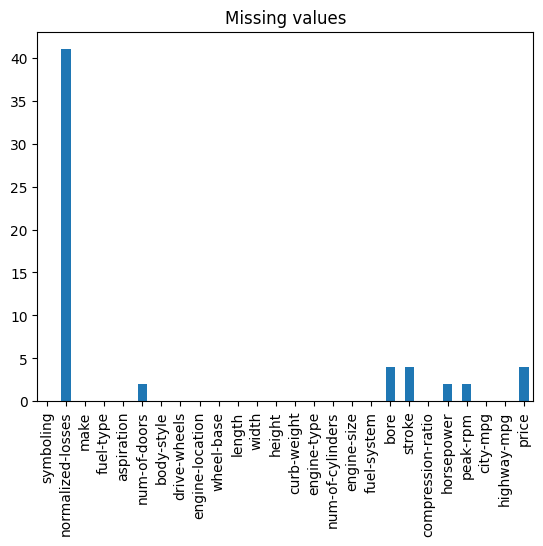

In [6]:
df.isna().sum().plot(kind='bar', title='Missing values') # creats a bar chat for the missing values

### Dealing with missing values

**Removing missing values**
- `df.dropna()` removes the rows with missing values. this is not adviced if the dataset is very small (like this one)

In [7]:
df_removed = df.copy()
df_removed.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
df_removed.dropna(inplace=True) # removing all rows with missing values
df_removed.shape, df.shape # different shape from the original dataframe

((159, 26), (205, 26))

**fill missing values**
- `df.fillna(value)` used to fill the missing cells with `value` you define

In [9]:
df_filled = df.copy()
df_filled.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [10]:
df_filled.fillna(0, inplace=True) # replacing all NaN values with 0
df_filled.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [11]:
df_filled.shape, df.shape # same shape as original

((205, 26), (205, 26))

### Creating Dataframes
| from a list of dictionaries | from a dictionary of lists |
|-----------------------------|----------------------------|
| contructed row by row | constructed column by column |

In [12]:
import pandas as pd 

**list of dictionaries** <br>
pair the header `(key)` and each element in a row `(value)`. do this for each and every row in the raw data.

In [13]:
list_of_dicts = [
    {'name': 'ginger', 'breed': 'dachshund', 'height': 22,
     'weight': 10, 'dob': '2019-03-14'},
    {'name': 'scout', 'breed': 'dalmatian', 'height': 59,
     'weight': 25, 'dob': '2019-05-09'},
]
df_lod = pd.DataFrame(list_of_dicts)
df_lod


,name,breed,height,weight,dob
0,ginger,dachshund,22,10,2019-03-14
1,scout,dalmatian,59,25,2019-05-09


**dictionary of lists** <br>
- `key` --> column name
- `value` --> list of column values 

In [14]:
dict_of_lists = {
    'name': ['ginger', 'scout'],
    'breed': ['dachshund', 'dalmatian'],
    'height': [22, 59], 
    'weight': [10, 25],
    'dob': ['2019-03-14', '2019-05-09']
}
df_dol = pd.DataFrame(dict_of_lists)
df_dol 

,name,breed,height,weight,dob
0,ginger,dachshund,22,10,2019-03-14
1,scout,dalmatian,59,25,2019-05-09


### reading and writing to a csv file

**reading** <br>
`filename = "path/to/file.csv" ` location of file and 

`df = pd.read_csv(filename)`

**writing** <br>
`df.to_csv( "path/to/save/new_filename.csv" )`


In [15]:
df_dol.drop_duplicates()

,name,breed,height,weight,dob
0,ginger,dachshund,22,10,2019-03-14
1,scout,dalmatian,59,25,2019-05-09


# joining data with pandas

In [18]:
ls dataset 

 actors_movies.csv   cta_ridership.p     sequels.p          ward.p
 automobile.csv      financials.p       'S&P500.csv'        WorldBank_GDP.csv
 business_owners.p   land_use.p          stations.p         WorldBank_POP.csv
 casts.p             licenses.p          student_mat.csv*   zip_demo.p
 census.p            movies.p            taglines.p
 crews.p             movie_to_genres.p   taxi_owners.p
 cta_calendar.p      ratings.p           taxi_vehicles.p


### Innter join - mergin or joing tables

![Inner join]( ./image/innerjoin.png )

**intersection is row-wise**

**Remember that `.merge()` only returns rows where the values match in both tables.**

In [19]:
import pickle 
import numpy as np 
import pandas as pd 

In [20]:
# the ward data 
warddf = pd.read_pickle("./dataset/ward.p")
print(warddf.shape)
warddf.head()

(50, 4)


,ward,alderman,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649


In [21]:
# the census data
censusdf = pd.read_pickle("dataset/census.p")
print(censusdf.shape)
censusdf.head()

(50, 6)


,ward,pop_2000,pop_2010,change,address,zip
0,1,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


**comment:** the `census` and `ward` tables are related with their `"ward"` columns so we'll merge the two table using the `"ward"` as reference column.

```python
    # inner join (merge) syntax
    merge_df = left_df.merge(right_df, on="column_in_common")
```

In [22]:
# adding the "suffixes" option makes it posible to indicate with column belongs to which table 
ward_census = warddf.merge(censusdf, on="ward", suffixes=("_ward", "_cen"))
print(ward_census.shape)
ward_census.head(2)

(50, 9)


,ward,alderman,address_ward,zip_ward,pop_2000,pop_2010,change,address_cen,zip_cen
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622


In [23]:
taxi_owners = pd.read_pickle("dataset/taxi_owners.p")
taxi_veh = pd.read_pickle("dataset/taxi_vehicles.p")
taxi_owners.head(1)

,rid,vid,owner,address,zip
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630


In [24]:
taxi_veh.head(1) # we can merge with reference column "vid"

,vid,make,model,year,fuel_type,owner
0,2767,TOYOTA,CAMRY,2013,HYBRID,SEYED M. BADRI


In [25]:
owner_veh = taxi_owners.merge(taxi_veh, on="vid", suffixes=("_own", "_veh"))
owner_veh.head(1)

,rid,vid,owner_own,address,zip,make,model,year,fuel_type,owner_veh
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630,NISSAN,ALTIMA,2011,HYBRID,AGEAN TAXI LLC


In [26]:
warddf_alt = warddf.copy()
warddf_alt.loc[1,'ward'] = "99"
warddf_alt.head()

,ward,alderman,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,99,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649


In [27]:
censusdf_alt = censusdf.copy()
censusdf_alt.loc[0, "ward"], censusdf_alt.loc[4, "ward"] = "99", "99"
censusdf_alt.head()

,ward,pop_2000,pop_2010,change,address,zip
0,99,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,99,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


**Remember that `.merge()` only returns rows where the values match in both tables.**

In [28]:
# merging ward with census_alt and ward_alt with census
original = warddf.merge(censusdf, on="ward")
print(
    f'Shape of original data: {original.shape}'
)

w_census_alt = warddf.merge(censusdf_alt, on='ward')
print(
    f'Merged shape of ward and census altered: {w_census_alt.shape}'
)

c_warddf_alt = censusdf.merge(warddf_alt, on='ward')
print(
    f'Merged shape of census altered and ward: {c_warddf_alt.shape}'
)


Shape of original data: (50, 9)
Merged shape of ward and census altered: (48, 9)
Merged shape of census altered and ward: (49, 9)


### relationships

- in **one-to-one:** relationship, every row in the left table is related to one and only one row in the right table. for example every row from the original `ward` table is related to one row in the `census` table when the reference is the column "ward"

- in **one-to-many** relationship, every row in the left table is related to one or more rows in the right table




In [29]:
lindf = pd.read_pickle("dataset/licenses.p")
lindf.head()

,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613


In [30]:
# since "ward = 2" apears 301 times in the licdf table it means
# that when we merge it with the warddf we will have the row 
# with "ward = 2" appear 301 times 

lindf["ward"].value_counts()[:5]

ward
42    1371
27     497
25     321
2      301
47     275
Name: count, dtype: int64

In [31]:
ward_lin = warddf.merge(lindf, on="ward") # one-to-many
print(ward_lin.shape)
ward_lin.head()  # we can see that the rows are repeating 

(10000, 9)


,ward,alderman,address_x,zip_x,account,aid,business,address_y,zip_y
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,12024,NaN,DIGILOG ELECTRONICS,1038 N ASHLAND AVE,60622
1,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14446,743,EMPTY BOTTLE INC,1035 N WESTERN AVE 1ST,60622
2,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14624,775,LITTLE MEL'S HOT DOG,2205 N CALIFORNIA AVE,60647
3,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14987,NaN,MR. BROWN'S LOUNGE,2301 W CHICAGO AVE 1ST,60622
4,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,15642,814,Beat Kitchen,2000-2100 W DIVISION ST,60622


### merging multiple dataframes

the idea is to merge the tables one after the other based on the column they have in common. 

![merging multiple dataframes](./image/multmerge.png)

in the image above, we would first merge `cal` and `ridership` tables first on the columns "year", "month", and "day" then merge that result with the `station` table on the column "station_id"

### left join

```python
    # syntax:
    merged_df = first_df.merge(second_df, on="similar column", how="left")
```

- **Recap (inner join)** returns only the rows with matching results in the other table.

![left join](./image/leftjoin.png)

**returns all rows in the left table and only the rows in the right table that matches with the rows in the left table. in essence the number of rows in the merged table will be the same as the number of tables in the left table**

![left join example](./image/leftjoin2.png)

In [32]:
ls dataset/

 actors_movies.csv   cta_ridership.p     sequels.p          ward.p
 automobile.csv      financials.p       'S&P500.csv'        WorldBank_GDP.csv
 business_owners.p   land_use.p          stations.p         WorldBank_POP.csv
 casts.p             licenses.p          student_mat.csv*   zip_demo.p
 census.p            movies.p            taglines.p
 crews.p             movie_to_genres.p   taxi_owners.p
 cta_calendar.p      ratings.p           taxi_vehicles.p


In [33]:
import pandas as pd

In [34]:
movies = pd.read_pickle("dataset/movies.p")
print(movies.shape)
movies.head(2)

(4803, 4)


,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12


In [35]:
taglines = pd.read_pickle("dataset/taglines.p")
print(taglines.shape)
taglines.head(2)

(3955, 2)


,id,tagline
0,19995,Enter the World of Pandora.
1,285,"At the end of the world, the adventure begins."


In [36]:
# merging the movies and taglines table

movies_tag = movies.merge(taglines, on="id", how="left")
print(movies_tag.shape)
movies_tag.head(2)

(4803, 5)


,id,title,popularity,release_date,tagline
0,257,Oliver Twist,20.415572,2005-09-23,NaN
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,Never underestimate an overachiever.


**comment on left join** <br>
the first table `movies` had 4803 rows; the second, `taglines` had 3955 rows. we can observe that the merge of the movies and taglines tables into the `movies_tag` table has the same number of rows as the first table `movies`.

In [37]:
finans = pd.read_pickle("dataset/financials.p")
print(finans.shape)
finans.head(2)

(3229, 3)


,id,budget,revenue
0,19995,237000000,2.787965e+09
1,285,300000000,9.610000e+08


In [38]:
movies_financials = movies.merge(finans, on="id", how="left")
print(movies_financials.shape)
movies_financials.head(2)

(4803, 6)


,id,title,popularity,release_date,budget,revenue
0,257,Oliver Twist,20.415572,2005-09-23,50000000.0,42093706.0
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,NaN,NaN


In [39]:
# Count the number of rows in the budget column that are missing
movies_financials.budget.isna().sum()

1574

### Right joins

(direct opposite of the left join) It returns all the rows of the right dataframe and only the rows of the left dataframe that have matching values of the columns they're merging on.

![Right join]( ./image/rightjoin.png )

example of how the merged table looks after right join

![Right join example]( ./image/rightjoin2.png )


In [40]:
ls dataset/

 actors_movies.csv   cta_ridership.p     sequels.p          ward.p
 automobile.csv      financials.p       'S&P500.csv'        WorldBank_GDP.csv
 business_owners.p   land_use.p          stations.p         WorldBank_POP.csv
 casts.p             licenses.p          student_mat.csv*   zip_demo.p
 census.p            movies.p            taglines.p
 crews.p             movie_to_genres.p   taxi_owners.p
 cta_calendar.p      ratings.p           taxi_vehicles.p


In [41]:
import pandas as pd

In [42]:
movie_to_genres = pd.read_pickle("./dataset/movie_to_genres.p")
print(movie_to_genres.shape)
movie_to_genres.head(2)

(12160, 2)


,movie_id,genre
0,5,Crime
1,5,Comedy


In [43]:
tv_genre = movie_to_genres[movie_to_genres['genre'] == "TV Movie"]
tv_genre

,movie_id,genre
4998,10947,TV Movie
5994,13187,TV Movie
7443,22488,TV Movie
10061,78814,TV Movie
10790,153397,TV Movie
10835,158150,TV Movie
11096,205321,TV Movie
11282,231617,TV Movie


In [44]:
movies = pd.read_pickle("./dataset/movies.p")
print(movies.shape)
movies.head(2)

(4803, 4)


,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12


In [45]:
tv_movies = movies.merge(tv_genre, how="right", left_on="id", right_on="movie_id")
tv_movies

,id,title,popularity,release_date,movie_id,genre
0,10947,High School Musical,16.536374,2006-01-20,10947,TV Movie
1,13187,A Charlie Brown Christmas,8.701183,1965-12-09,13187,TV Movie
2,22488,Love's Abiding Joy,1.128559,2006-10-06,22488,TV Movie
3,78814,We Have Your Husband,0.102003,2011-11-12,78814,TV Movie
4,153397,Restless,0.812776,2012-12-07,153397,TV Movie
5,158150,How to Fall in Love,1.923514,2012-07-21,158150,TV Movie
6,205321,Sharknado,20.466433,2013-07-11,205321,TV Movie
7,231617,"Signed, Sealed, Delivered",1.444476,2013-10-13,231617,TV Movie


### outer join

will return all the rows from both tables regardless if there's a match between the two (union of rows)

![Outer Join]( ./image/outerjoin.png )

this is an example of how it looks 

![Outer join example]( ./image/outerjoin2.png )


In [46]:
family = movie_to_genres[ movie_to_genres["genre"] == "Family" ]
print(family.shape)
family.head(2)

(513, 2)


,movie_id,genre
5,12,Family
33,35,Family


In [47]:
comedy = movie_to_genres[ movie_to_genres["genre"] == "Comedy" ]
print(comedy.shape)
comedy.head(2)

(1722, 2)


,movie_id,genre
1,5,Comedy
7,13,Comedy


In [48]:
family_comedy = family.merge(comedy, on="movie_id", how="outer", suffixes=("_fam", "_com"))
print(family_comedy.shape)
family_comedy.head(2)

(1936, 3)


,movie_id,genre_fam,genre_com
0,5,NaN,Comedy
1,12,Family,NaN


In [49]:
# movies which are in both genres 
fc = family_comedy.dropna()
print(fc.shape)
fc.head()

(299, 3)


,movie_id,genre_fam,genre_com
3,35,Family,Comedy
10,105,Family,Comedy
13,118,Family,Comedy
17,165,Family,Comedy
21,196,Family,Comedy


In [50]:
# movies with only the family genre
family_only = family_comedy[ family_comedy["genre_com"] != "Comedy" ]
print(family_only.shape)
family_only.head()

(214, 3)


,movie_id,genre_fam,genre_com
1,12,Family,NaN
14,129,Family,NaN
27,252,Family,NaN
28,257,Family,NaN
41,408,Family,NaN


In [51]:
# movies with only the comedy genre
comedy_only = family_comedy[ family_comedy["genre_fam"].isnull() ]
print(comedy_only.shape)
comedy_only.head()

(1423, 3)


,movie_id,genre_fam,genre_com
0,5,NaN,Comedy
2,13,NaN,Comedy
4,68,NaN,Comedy
5,71,NaN,Comedy
6,75,NaN,Comedy


In [52]:
movies.columns, print(movies.shape)

(4803, 4)


(Index(['id', 'title', 'popularity', 'release_date'], dtype='object'), None)

In [53]:
family_only.columns, print(family_only.shape)

(214, 3)


(Index(['movie_id', 'genre_fam', 'genre_com'], dtype='object'), None)

**joining tables with different columns but similar information in the columns**

In [54]:
family_movies = family.merge(movies, how="inner", left_on="movie_id", right_on="id")
print(family_movies.shape)
family_movies.head()

(513, 6)


,movie_id,genre,id,title,popularity,release_date
0,12,Family,12,Finding Nemo,85.688789,2003-05-30
1,35,Family,35,The Simpsons Movie,46.875375,2007-07-25
2,105,Family,105,Back to the Future,76.603233,1985-07-03
3,118,Family,118,Charlie and the Chocolate Factory,53.905592,2005-07-13
4,129,Family,129,Spirited Away,118.968562,2001-07-20


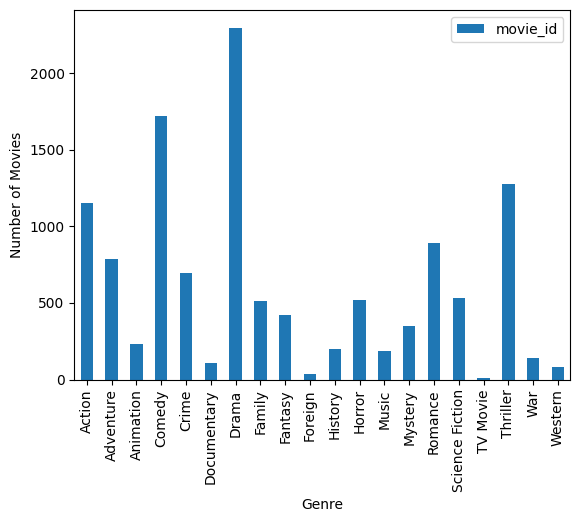

In [55]:
import matplotlib.pyplot as plt

genre_count = movie_to_genres.groupby("genre").agg({'movie_id':'count'})
genre_count.plot(kind="bar")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.show()

### self join

![self join]( ./image/selfjoin.png )

**NB:** the left table is the same dataframe as the right table



In [56]:
ls dataset/

 actors_movies.csv   cta_ridership.p     sequels.p          ward.p
 automobile.csv      financials.p       'S&P500.csv'        WorldBank_GDP.csv
 business_owners.p   land_use.p          stations.p         WorldBank_POP.csv
 casts.p             licenses.p          student_mat.csv*   zip_demo.p
 census.p            movies.p            taglines.p
 crews.p             movie_to_genres.p   taxi_owners.p
 cta_calendar.p      ratings.p           taxi_vehicles.p


In [57]:
sequels = pd.read_pickle("dataset/sequels.p")
print(sequels.shape)
sequels.head(3)

(4803, 3)


,id,title,sequel
0,19995,Avatar,<NA>
1,862,Toy Story,863
2,863,Toy Story 2,10193


**comment:** let's take "toy story" as the example. the sequel code "863"is the movie id for the toy story 2, which is the sequel to toy story (original). in that same sense, 10193 is the id for toy story 3 which is a sequel to toy story 2.

In [58]:
# subsetting movies with at least 1 sequel 
original_sequels = sequels.merge(sequels, left_on="sequel", right_on="id", suffixes=('_org', '_seq'))
print(original_sequels.shape)
original_sequels.head()

(90, 6)


,id_org,title_org,sequel_org,id_seq,title_seq,sequel_seq
0,862,Toy Story,863,863,Toy Story 2,10193
1,863,Toy Story 2,10193,10193,Toy Story 3,<NA>
2,675,Harry Potter and the Order of the Phoenix,767,767,Harry Potter and the Half-Blood Prince,<NA>
3,121,The Lord of the Rings: The Two Towers,122,122,The Lord of the Rings: The Return of the King,<NA>
4,120,The Lord of the Rings: The Fellowship of the Ring,121,121,The Lord of the Rings: The Two Towers,122


In [59]:
original_sequels[['title_org', 'title_seq']].head()

,title_org,title_seq
0,Toy Story,Toy Story 2
1,Toy Story 2,Toy Story 3
2,Harry Potter and the Order of the Phoenix,Harry Potter and the Half-Blood Prince
3,The Lord of the Rings: The Two Towers,The Lord of the Rings: The Return of the King
4,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Two Towers


In [60]:
os = original_sequels.copy()
os = os.sort_values('id_org', ascending=True)
os.head()

,id_org,title_org,sequel_org,id_seq,title_seq,sequel_seq
10,22,Pirates of the Caribbean: The Curse of the Bla...,58,58,Pirates of the Caribbean: Dead Man's Chest,<NA>
85,76,Before Sunrise,80,80,Before Sunset,132344
81,80,Before Sunset,132344,132344,Before Midnight,<NA>
30,87,Indiana Jones and the Temple of Doom,89,89,Indiana Jones and the Last Crusade,217
20,89,Indiana Jones and the Last Crusade,217,217,Indiana Jones and the Kingdom of the Crystal S...,<NA>


In [61]:
os[['title_org', 'title_seq']].head()

,title_org,title_seq
10,Pirates of the Caribbean: The Curse of the Bla...,Pirates of the Caribbean: Dead Man's Chest
85,Before Sunrise,Before Sunset
81,Before Sunset,Before Midnight
30,Indiana Jones and the Temple of Doom,Indiana Jones and the Last Crusade
20,Indiana Jones and the Last Crusade,Indiana Jones and the Kingdom of the Crystal S...


**when to merge a table to itself** 
- hierarchical relationships
- sequential relationships
- graph data

### Filtering joins

**mutating joins (inner, left, right)**
- combines data from two tables based on mathching observations in both tables

**filtering joins**
- filter observations from table based on whether or not they match an observation in another table

_examples_ <br>

**semi join**

![semi join example]( image/semijoin.png )

- returns the intersection (ref to rows), similar to an inner join
- returns only columns from the left table and not the right 
- no duplicates 

```python
    # example: genres and top_tracks are dataframes

    genres_tracks = genres.merge(top_tracks, on='gid')
    top_genres = genres[ genres['gid'].isin(genres_tracks['gid']) ]
```


**anti join**

![anti join example]( image/antijoin.png )

- returns the left table, exluding the intersection
- returns only columns from the left table and not the right

```python
    # example: genres and top_tracks are dataframes 
    
    genre_tracks = genres.merge(top_tracks, on='gid', how='left', indicator=True) # adds another column that sepcifies if a row is found in both tables ("both") or only the "how" (left) table ("left_only")
    gid_list = genres_tracks.loc[ genres_tracks['_merge'] == 'left_only', 'gid' ] # creats a list of "gid" using only rows with the "left_only" indication
    non_top_genres = genres[ genres['gid'].isin(git_list) ]
```


In [62]:
ls dataset/

 actors_movies.csv   cta_ridership.p     sequels.p          ward.p
 automobile.csv      financials.p       'S&P500.csv'        WorldBank_GDP.csv
 business_owners.p   land_use.p          stations.p         WorldBank_POP.csv
 casts.p             licenses.p          student_mat.csv*   zip_demo.p
 census.p            movies.p            taglines.p
 crews.p             movie_to_genres.p   taxi_owners.p
 cta_calendar.p      ratings.p           taxi_vehicles.p


**below is a semi join**

In [63]:
import pandas as pd 

movies = pd.read_pickle("dataset/movies.p")[:100]
print(movies.shape)
movies.head(2)

(100, 4)


,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12


In [64]:
moviegenres = pd.read_pickle('dataset/movie_to_genres.p')
print(moviegenres.shape)
moviegenres.head(2)

(12160, 2)


,movie_id,genre
0,5,Crime
1,5,Comedy


In [65]:
moviegenres.genre.nunique()

20

In [66]:
movies_with_genres = moviegenres.merge(movies,
                                  right_on="id",
                                  left_on="movie_id",
                                  how="inner")
print(movies_with_genres.shape)
movies_with_genres.head(2)

(246, 6)


,movie_id,genre,id,title,popularity,release_date
0,59,Thriller,59,A History of Violence,34.628738,2005-09-23
1,59,Drama,59,A History of Violence,34.628738,2005-09-23


In [67]:
top_genres = moviegenres[ moviegenres['genre'].isin(movies_with_genres['genre']) ]
top_genres['genre'].nunique()

16

**comment**
so what we did was to get the unique documentary per movie from the `moviegenres` dataframe which have corresponding entries in the `movies` dataframe. howeverer, since one movie can have multiple genres we can observe that the dataset size is very large with the genres repeating (although for different movie ids). with that said not that the `.nunqiue()` method returns 16 unique genres instead of the 20 which exists in the `moviegenres` table.

### concatenate dataframes together vertically
- pandas `.concat()` method can concatenate both vertical and horizontal.
    - `axis = 0`, vertical

In [68]:
import pandas as pd

In [69]:
table1 = {"A" : ["a1", 'a2', 'a3'],
          "B" : ['b1', 'b2', 'b3'],
          "C" : ['c1', 'c2', 'c3']
          }
table2 = {"A" : ['a4', 'a5'],
          "B" : ['b4', 'b5'],
          "C" : ['c4', 'c5']
          }
table3 = {"A" : ['a6', 'a7'],
          "D" : ['d1', 'd2']
          }

df1 = pd.DataFrame(table1)
df2 = pd.DataFrame(table2)
df3 = pd.DataFrame(table3)

print(df1.head())
print()
print(df2.head())
print()
print(df3.head())

    A   B   C
0  a1  b1  c1
1  a2  b2  c2
2  a3  b3  c3

    A   B   C
0  a4  b4  c4
1  a5  b5  c5

    A   D
0  a6  d1
1  a7  d2


In [70]:
# concatenate two tables vertically (with the same column names)

pd.concat([df1, df2])


,A,B,C
0,a1,b1,c1
1,a2,b2,c2
2,a3,b3,c3
0,a4,b4,c4
1,a5,b5,c5


In [71]:
# set the ignore index option to re-number the concatenated table as a single table 
# and not separate tables as seen above (do this if the index are not informative)

pd.concat([df1, df2], ignore_index=True)

,A,B,C
0,a1,b1,c1
1,a2,b2,c2
2,a3,b3,c3
3,a4,b4,c4
4,a5,b5,c5


In [72]:
# setting labels to original tables

newdf = pd.concat([df1, df2], ignore_index=False, keys=['first', 'second'])
newdf

# i'm pretty sure the default of the < option > "ignore_index = False"
# so that option could be omitted 

# note: this creates a multi-level index

A   B   C
first  0  a1  b1  c1
       1  a2  b2  c2
       2  a3  b3  c3
second 0  a4  b4  c4
       1  a5  b5  c5

In [73]:
# slicing our "newdf"

print( newdf.loc[('first', 1)] ) # multi-level index slicing

print()

print( newdf.loc[('second', 0)] )

A    a2
B    b2
C    c2
Name: (first, 1), dtype: object

A    a4
B    b4
C    c4
Name: (second, 0), dtype: object


In [74]:
# concatenate tables with differenct column names 

pd.concat([df2, df3], sort=True, ignore_index=True)

,A,B,C,D
0,a4,b4,c4,NaN
1,a5,b5,c5,NaN
2,a6,NaN,NaN,d1
3,a7,NaN,NaN,d2


In [75]:
# concatenate tables with different column names
# but only show the matching columns from both 
# tables 

pd.concat([df1, df2, df3],
          join='inner',                         # (default) join = 'outer'
          keys=['first', 'second', 'third'])  

A
first  0  a1
       1  a2
       2  a3
second 0  a4
       1  a5
third  0  a6
       1  a7

**IN (NAIVE) SUMMARY, JOINS MERGE ROWS AND CONCATENATION MERGE COLUMNS**

**verifying intergrity of our data**
- Possible `merging` issue:
    - unintentional one-to-many relationship
    - unintentional many-to-many relationship
- Possible `concat` issue:
    - duplicate records possibly unintentionally (if the record exits in both tables)

**validating merges** <br>
`.merge(validate=None)` by default the value is set to `None`. However, we can check if the merge is of specified type, if not an error is raised. Types:
- one_to_one
- one_to_many
- many_to_one
- many_to_many
For example if we run this code:
```python
    first_table.merge(second_table, on='id', validate='one_to_one')

    # this raises an error if the relationship between the tables isn't one-to-one 
```

**verifying concatenations** <br>
`.concat(verify_integrity=False)` by default the value is set to `False`. However, if set to `True`, it checks whether the new concatenated index contains duplicates and raise error if there are.

**why verify integrity and what to do**
- Why?
    - real world data is often NOT clean. This might result in skewed data or create inaccurate plots
- What to do?
    - Drop duplicate rows
    - Fix incorrect value errors


### MERGING ORDERED AND TIME-SERIES DATA

**using `merge_ordered()`** merges the tables as well as order the results and is most suitable for time series data where order is important

Comparison between the (earlier) merge method and (this) merge_ordered function...

| `.merge()` method | `pd.merge_ordered()` method |
|-------------------|-----------------------------|
| column(s) to join: `on`, `left_on`, and `right_on` | column(s) to join on: `on`, `left_on`, and `right_on` |
| type of join **(default: inner)**: `how = ` *(inner, left, right, outer)* | type of join **(default: outer)**: `how = ` *(inner, left, right, outer)* |
| overlapping column names: `suffixes` | overlapping column names: `suffixes` |
| calling the method: `left_table.merge(right_table,)` | calling the function: `pd.merge_ordered(left_table, right_table)` |

**when to use `merge_ordered()`?**
- ordered data (eg: time series)
- filling in missing values


In [76]:
ls dataset/

 actors_movies.csv   cta_ridership.p     sequels.p          ward.p
 automobile.csv      financials.p       'S&P500.csv'        WorldBank_GDP.csv
 business_owners.p   land_use.p          stations.p         WorldBank_POP.csv
 casts.p             licenses.p          student_mat.csv*   zip_demo.p
 census.p            movies.p            taglines.p
 crews.p             movie_to_genres.p   taxi_owners.p
 cta_calendar.p      ratings.p           taxi_vehicles.p


In [77]:
import pandas as pd 

In [78]:
appl_dict = {'date': ['2007-02-01', '2007-03-01', '2007-04-01', '2007-05-01', '2007-06-01'],
             'close': [12, 13, 14, 17, 17.5]}

mcd_dict = {'date': ['2007-01-01', '2007-02-01', '2007-03-01', '2007-04-01', '2007-05-01'],
             'close': [44, 43, 45, 48, 50]}

appl = pd.DataFrame(appl_dict)
mcd = pd.DataFrame(mcd_dict)

In [79]:
appl.head()

,date,close
0,2007-02-01,12.0
1,2007-03-01,13.0
2,2007-04-01,14.0
3,2007-05-01,17.0
4,2007-06-01,17.5


In [80]:
mcd.head()

,date,close
0,2007-01-01,44
1,2007-02-01,43
2,2007-03-01,45
3,2007-04-01,48
4,2007-05-01,50


**comment: this results in table sorted by "date". also, note the option `fill_method='ffill'`, fills the missing data with information before it (i.e price of mcd on 2007-05-01 will be inputted as the value for mcd on 2007-06-01)**

In [81]:
# this results in a table sorted by date
pd.merge_ordered(appl, mcd, on='date', suffixes=('_appl', '_mcd'))


,date,close_appl,close_mcd
0,2007-01-01,NaN,44.0
1,2007-02-01,12.0,43.0
2,2007-03-01,13.0,45.0
3,2007-04-01,14.0,48.0
4,2007-05-01,17.0,50.0
5,2007-06-01,17.5,NaN


In [82]:
# filling missing values with previous entries 
pd.merge_ordered(appl, mcd, on='date', suffixes=('_appl', '_mcd'), fill_method='ffill')

# observe that the price of appl on 2007-01-01 is still missing;
# that is because there are no values above it

,date,close_appl,close_mcd
0,2007-01-01,NaN,44
1,2007-02-01,12.0,43
2,2007-03-01,13.0,45
3,2007-04-01,14.0,48
4,2007-05-01,17.0,50
5,2007-06-01,17.5,50


**using `merge_asof()`** is similar to an ordered left join (`merge_ordered(how='left')`). However, unlike an ordered left join, **`merge_asof()` will match on the nearest value columns rather than equal values**.

- **NOTE:** merged "on" columns must be sorted
- the "nearest value" is the largest value (from the right table) less than or equal to the value (on the left table) from the reference column.

![merging using merge_asof](./image/masof.png)

**when to use `merge_asof()`?**
- data sampled from a process
- developing a training set (no data leakage)

In [2]:
import pandas as pd

In [10]:
visa_dict = {
    'date_time': [
        '2017-11-17 16:00:00',
        '2017-11-17 17:00:00',
        '2017-11-17 18:00:00',
        '2017-11-17 19:00:00',
        '2017-11-17 20:00:00',
        '2017-11-17 21:00:00',
        '2017-11-17 22:00:00'
    ],
    'close': [
        110.32,
        110.24,
        110.065,
        110.04,
        110.0,
        109.9966,
        109.82
    ]
}

visa = pd.DataFrame(visa_dict)



In [11]:
ibm_dict = {
    'date_time': [
        '2017-11-17 15:35:12',
        '2017-11-17 15:40:04',
        '2017-11-17 15:45:50',
        '2017-11-17 15:50:20',
        '2017-11-17 15:55:10',
        '2017-11-17 16:00:03',
        '2017-11-17 16:05:06',
        '2017-11-17 16:10:12',
        '2017-11-17 16:15:30',
        '2017-11-17 16:20:32',
        '2017-11-17 16:25:47'
    ],
    'close': [
        149.3,
        149.13,
        148.98,
        148.99,
        149.11,
        149.25,
        149.5175,
        149.57,
        149.59,
        149.82,
        149.96
    ]
}

ibm = pd.DataFrame(ibm_dict)


In [18]:
visa

,date_time,close
0,2017-11-17 16:00:00,110.3200
1,2017-11-17 17:00:00,110.2400
2,2017-11-17 18:00:00,110.0650
3,2017-11-17 19:00:00,110.0400
4,2017-11-17 20:00:00,110.0000
5,2017-11-17 21:00:00,109.9966
6,2017-11-17 22:00:00,109.8200


In [19]:
ibm

,date_time,close
0,2017-11-17 15:35:12,149.3000
1,2017-11-17 15:40:04,149.1300
2,2017-11-17 15:45:50,148.9800
3,2017-11-17 15:50:20,148.9900
4,2017-11-17 15:55:10,149.1100
5,2017-11-17 16:00:03,149.2500
6,2017-11-17 16:05:06,149.5175
7,2017-11-17 16:10:12,149.5700
8,2017-11-17 16:15:30,149.5900
9,2017-11-17 16:20:32,149.8200


**comment: our output is similar to a left join, so we see all of the rows from the `visa` talble. however, the values from the `ibm` table are based on how close the `date_time` values match with the `visa` table.  Notice the first row and the IBM price of 149.11. Let's show the IBM table again and see why this value was chosen in the merger. It comes from the row indexed as 4. This row has the closest date_time that is less than the date_time in the Visa table.**

In [17]:
visa['date_time'] = pd.to_datetime(visa['date_time'])
ibm['date_time'] = pd.to_datetime(ibm['date_time'])

pd.merge_asof(visa, ibm, on='date_time', suffixes=('_visa', '_ibm'))


,date_time,close_visa,close_ibm
0,2017-11-17 16:00:00,110.3200,149.11
1,2017-11-17 17:00:00,110.2400,149.96
2,2017-11-17 18:00:00,110.0650,149.96
3,2017-11-17 19:00:00,110.0400,149.96
4,2017-11-17 20:00:00,110.0000,149.96
5,2017-11-17 21:00:00,109.9966,149.96
6,2017-11-17 22:00:00,109.8200,149.96


In [20]:
pd.merge_asof(visa, ibm, on='date_time', suffixes=('_visa', '_ibm'), direction='forward')

,date_time,close_visa,close_ibm
0,2017-11-17 16:00:00,110.3200,149.25
1,2017-11-17 17:00:00,110.2400,NaN
2,2017-11-17 18:00:00,110.0650,NaN
3,2017-11-17 19:00:00,110.0400,NaN
4,2017-11-17 20:00:00,110.0000,NaN
5,2017-11-17 21:00:00,109.9966,NaN
6,2017-11-17 22:00:00,109.8200,NaN


**similarities and difference between `merge_asof()` and `merge_ordered()` functions**

| `pd.merge_asof()` | both | `pd.merge_ordered()` |
|-------------------|------|----------------------|
| has an argument that can be set to 'forward' to select the first row in the right tables whose key column is greater than or equal to the left's. | this function can set the suffix for overlapping column names. | it allows for a right join during the merge. |
| it can be used to do fuzzy (not clear) matching of dates between tables. | this function can be used when working with ordered or time-series data. | if it cannot match the rows of the tables exactly, it can use forward fill to interpolate the missing data. |
| after matching two tables, if there are missing values at the top of the table from | | |




**selecting data with `.query()`**

`.query('SOME SELECT STATEMENT')`

accepts an input string:
- input string used to determine what rows are returned
- input string similar to statement after WHERE clause in SQL statement



In [21]:
stocks_dict = {
    'date': [
        '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
        '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01'
    ],
    'disney': [
        143.009995, 137.259995, 130.320007, 129.919998, 151.580002,
        144.630005, 138.309998, 117.650002, 96.599998, 99.580002
    ],
    'nike': [
        86.029999, 84.5, 93.919998, 89.550003, 93.489998,
        101.309998, 96.300003, 89.379997, 82.739998, 84.629997
    ]
}

stocks = pd.DataFrame(stocks_dict)
stocks


,date,disney,nike
0,2019-07-01,143.009995,86.029999
1,2019-08-01,137.259995,84.500000
2,2019-09-01,130.320007,93.919998
3,2019-10-01,129.919998,89.550003
4,2019-11-01,151.580002,93.489998
5,2019-12-01,144.630005,101.309998
6,2020-01-01,138.309998,96.300003
7,2020-02-01,117.650002,89.379997
8,2020-03-01,96.599998,82.739998
9,2020-04-01,99.580002,84.629997


In [22]:
stocks.query('nike >= 90')

,date,disney,nike
2,2019-09-01,130.320007,93.919998
4,2019-11-01,151.580002,93.489998
5,2019-12-01,144.630005,101.309998
6,2020-01-01,138.309998,96.300003


In [23]:
stocks.query('nike > 90 and disney < 140')

,date,disney,nike
2,2019-09-01,130.320007,93.919998
6,2020-01-01,138.309998,96.300003


In [24]:
stocks.query('nike > 96 or disney < 98')

,date,disney,nike
5,2019-12-01,144.630005,101.309998
6,2020-01-01,138.309998,96.300003
8,2020-03-01,96.599998,82.739998


In [25]:
stocks_long_dict = {
    'date': [
        '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
        '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01'
    ],
    'stock': [
        'disney', 'disney', 'disney', 'disney', 'disney',
        'nike', 'nike', 'nike', 'nike', 'nike'
    ],
    'close': [
        143.009995, 137.259995, 130.320007, 129.919998, 151.580002,
        86.029999, 84.5, 93.919998, 89.550003, 93.489998
    ]
}

stocks_long = pd.DataFrame(stocks_long_dict)
stocks_long

,date,stock,close
0,2019-07-01,disney,143.009995
1,2019-08-01,disney,137.259995
2,2019-09-01,disney,130.320007
3,2019-10-01,disney,129.919998
4,2019-11-01,disney,151.580002
5,2019-07-01,nike,86.029999
6,2019-08-01,nike,84.500000
7,2019-09-01,nike,93.919998
8,2019-10-01,nike,89.550003
9,2019-11-01,nike,93.489998


In [26]:
stocks_long.query('stock=="disney" or (stock=="nike" and close < 90)')

,date,stock,close
0,2019-07-01,disney,143.009995
1,2019-08-01,disney,137.259995
2,2019-09-01,disney,130.320007
3,2019-10-01,disney,129.919998
4,2019-11-01,disney,151.580002
5,2019-07-01,nike,86.029999
6,2019-08-01,nike,84.500000
8,2019-10-01,nike,89.550003


**reshaping data with `.melt()`** -  this method unpivot a table from wide (left) to long (right) format [see image below]

![format of tables](./image/melt.png)

*wide formatted data is easier to read by people than long formatted. however, long formatted data is often more accessible for computers to work with.*




In [27]:
social_fin_dict = {
    "financial": ["total_revenue", "gross_profit", "net_income", "total_revenue", "gross_profit", "net_income"],
    "company": ["twitter", "twitter", "twitter", "facebook", "facebook", "facebook"],
    "2019": [3459329, 2322288, 146569, 70697000, 57927000, 18485000],
    "2018": [3042359, 2077362, 1205596, 55838000, 46483000, 22112000],
    "2017": [2443299, 1582057, -108063, 40653000, 35199000, 15934000],
    "2016": [2529619, 1597379, -456873, 27638000, 23849000, 10217000]
}

social_fin = pd.DataFrame(social_fin_dict)
social_fin

,financial,company,2019,2018,2017,2016
0,total_revenue,twitter,3459329,3042359,2443299,2529619
1,gross_profit,twitter,2322288,2077362,1582057,1597379
2,net_income,twitter,146569,1205596,-108063,-456873
3,total_revenue,facebook,70697000,55838000,40653000,27638000
4,gross_profit,facebook,57927000,46483000,35199000,23849000
5,net_income,facebook,18485000,22112000,15934000,10217000


**comment: notice that the years are horizontal, we want to make the years columns vertical. to avoid changing the `financial` and `company` columns we set them as *identification variables* using the parameter `id_vars=['financial', 'company']`, we can also set the columns we want to pivot using the parameter `value_vars=['2018', '2017']`**

In [33]:
social_fin_tall = social_fin.melt(id_vars=['financial', 'company'])
social_fin_tall.head(10)

,financial,company,variable,value
0,total_revenue,twitter,2019,3459329
1,gross_profit,twitter,2019,2322288
2,net_income,twitter,2019,146569
3,total_revenue,facebook,2019,70697000
4,gross_profit,facebook,2019,57927000
5,net_income,facebook,2019,18485000
6,total_revenue,twitter,2018,3042359
7,gross_profit,twitter,2018,2077362
8,net_income,twitter,2018,1205596
9,total_revenue,facebook,2018,55838000


In [31]:
social_fin_tall_1817 = social_fin.melt(id_vars=['financial', 'company'],
                                       value_vars=['2018','2017'])
social_fin_tall_1817

,financial,company,variable,value
0,total_revenue,twitter,2018,3042359
1,gross_profit,twitter,2018,2077362
2,net_income,twitter,2018,1205596
3,total_revenue,facebook,2018,55838000
4,gross_profit,facebook,2018,46483000
5,net_income,facebook,2018,22112000
6,total_revenue,twitter,2017,2443299
7,gross_profit,twitter,2017,1582057
8,net_income,twitter,2017,-108063
9,total_revenue,facebook,2017,40653000


In [35]:
# option to change the column names 

social_fin_tall_1817 = social_fin.melt(id_vars=['financial', 'company'],
                                       value_vars=['2018','2017'],
                                       var_name='year',         # change "variable" -> "year"
                                       value_name='dollars')    # change "value" -> "dollars"
social_fin_tall_1817

,financial,company,year,dollars
0,total_revenue,twitter,2018,3042359
1,gross_profit,twitter,2018,2077362
2,net_income,twitter,2018,1205596
3,total_revenue,facebook,2018,55838000
4,gross_profit,facebook,2018,46483000
5,net_income,facebook,2018,22112000
6,total_revenue,twitter,2017,2443299
7,gross_profit,twitter,2017,1582057
8,net_income,twitter,2017,-108063
9,total_revenue,facebook,2017,40653000


# Introduction to statistics in python


### what is statistics?
- the field of statistics: the practice and study of collecting and analyzing data
- a summary statistic: a fact about or summary of some data

**what can statistics do?** <br>
some questions statistics can help us solve:
- how likely is someone to purchase a product? are people more likely to purchase it if they can use a different payment system?
- how many occupants will your hotel have? how can you optimize occumpancy?
- how many sizes of jeans need to be manufactured so they can fit 95% of the population? should the same number of each size be produced?
- A/B test: which ad is more effective in getting people to purchase a product?

**what can't stats do?** <br>
- why is game of thrones so popular?
**instead..**
- are series with more violent scenes viewed by more people?
**but...**
- even so, this can't tell us if more violent scenes lead to more views

**types of statistics**
| descriptive statistics | inferential statistics |
|------------------------|------------------------|
| describe and summarize data | use a sample of data to make inferences about a larger population |
| *examples:* 1. 50% of friends drive to work 2. 25% take teh bus 3. 25% bike | *example:* what percent of people drive to work |

<br>

| descriptive examples | inferential examples |
|----------------------|----------------------|
| given data on every customer service request made what's the average time it took to respond? | after interviewing 100 customers, what percent of all your customers are satistfied with your product? |
| given data on all 100,000 people who viewed an ad, what percent of people clicked on it? | given data on 20 fish caught in a lake, what's the average weight of all fish in the lake? |

**most common types of data**
**numeric (quantitative) --> scatter plot**
- continuos (measured): eg: airplane speed, time spent waiting in line
- discrete (counted): eg: number of pets, number of packages shipped

**categorical (qualitative) -->  bar plot**
- nominal (unordered): eg: married / unmarried, country of residence
- ordinal (ordered): eg: poor (0) / okay (1) / good (2) / excellent (3)





### measure of center

| mean | median | mode |
|------|--------|------|
| `np.mean()` | `np.median()` | `statistics.mode()` |
| average of the all the values | most central point of all the values | most occuring data point among all the data |
| sensitive to outliers. that implies that the value of the *mean* changes significantly if there's an anomally in the dataset | less sensitive to outliers. that implies that, values considered as anomallies don't really affect the value of the median as much |  |
| use the mean to describe the center of a distribution if the data is symmetric | use the median to describe the center of a distribution if the data is skewed |  |



**NB: the mean is always closer to the skewed point when compared to the median. i.e: left skewed - mean < median ||| right skewed - mean > median**


### measure of spread
how spread apart or close together the data points are 

**variance** - average distance from each data point to the data's mean. the higher the variance the more spread out the data is. `np.var(column, ddof=1)` is used for a sample and option `ddof=0` is used for a population

**standard deviation** - takes the square root of the variance. `np.std(column, ddof=1)`. std penalizes longer distances more than shorter ones

**mean absolute deviation** - takes the absolute value of the distances to the mean. `np.mean(np.abs( column - np.mean(column) ))`. mad penalizes each distance equally

**quantiles**
`np.quantile(column, [%])` eg: `np.quantile(column, 0.5)` is the 0.5 quantile which is the median

**interquartile range (iqr)**
- `np.quantile(column, .75) - np.quantile(column, .25)`
- `scipy.stats.iqr(column)`

**outliers** - data point that is substantially different from the others... *substantially different means:*
- data point(s) < Q1 - 1.5 X IQR 
- data point(s) > Q3 + 1.5 X IQR


In [2]:
ls dataset/

 actors_movies.csv   food_consumption.csv   taglines.p
 amir_deals.csv      land_use.p             taxi_owners.p
 automobile.csv      licenses.p             taxi_vehicles.p
 business_owners.p   movies.p               ward.p
 casts.p             movie_to_genres.p      WorldBank_GDP.csv
 census.p            ratings.p              WorldBank_POP.csv
 crews.p             sequels.p              world_happiness.csv
 cta_calendar.p     'S&P500.csv'            zip_demo.p
 cta_ridership.p     stations.p
 financials.p        student_mat.csv*


In [7]:
import pandas as pd 

In [8]:
df1 = pd.read_csv('./dataset/amir_deals.csv')
df1.head(3)

,Unnamed: 0,product,client,status,amount,num_users
0,1,Product F,Current,Won,7389.52,19
1,2,Product C,New,Won,4493.01,43
2,3,Product B,New,Won,5738.09,87


In [9]:
df2 = pd.read_csv('./dataset/food_consumption.csv')
df2.head(3)

,Unnamed: 0,country,food_category,consumption,co2_emission
0,1,Argentina,pork,10.51,37.20
1,2,Argentina,poultry,38.66,41.53
2,3,Argentina,beef,55.48,1712.00


In [10]:
df3 = pd.read_csv('./dataset/world_happiness.csv')
df3.head(3)

,Unnamed: 0,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
0,1,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
1,2,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
2,3,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
